<a href="https://colab.research.google.com/github/Meghana09G/QUIZ-1/blob/main/700761933_Quiz_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [ ]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
from tensorflow.keras import layers, models

lenet = models.Sequential([
    layers.Conv2D(32, kernel_size=5, strides=1, activation='relu', input_shape=(32,32,3), padding='same'),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2)),  # Specify pool_size
    layers.Conv2D(64, kernel_size=5, strides=1, activation='relu', padding='valid'),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2)),  # Specify pool_size
    layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='valid'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
lenet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 325,962 (1.24 MB)

 Trainable params: 325,770 (1.24 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
lenet.compile(optimizer=Adam(learning_rate=0.0005), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])


In [ ]:
hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4442 - loss: 1.5341 - val_accuracy: 0.4320 - val_loss: 1.7128
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6522 - loss: 0.9835 - val_accuracy: 0.6433 - val_loss: 1.0371
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7271 - loss: 0.7781 - val_accuracy: 0.6087 - val_loss: 1.1913
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7770 - loss: 0.6309 - val_accuracy: 0.6898 - val_loss: 0.9251
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8191 - loss: 0.5105 - val_accuracy: 0.7027 - val_loss: 0.9016
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8592 - loss: 0.4092 - val_accuracy: 0.7129 - val_loss: 0.9214
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8845 - loss: 0.3299 - val_accuracy: 0.7066 - val_loss: 0.9846
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9130 - loss

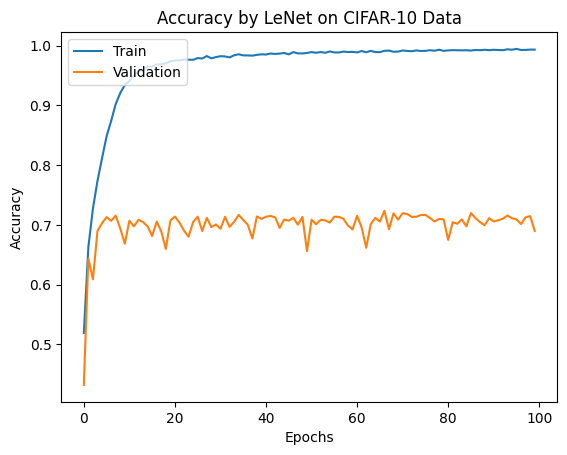

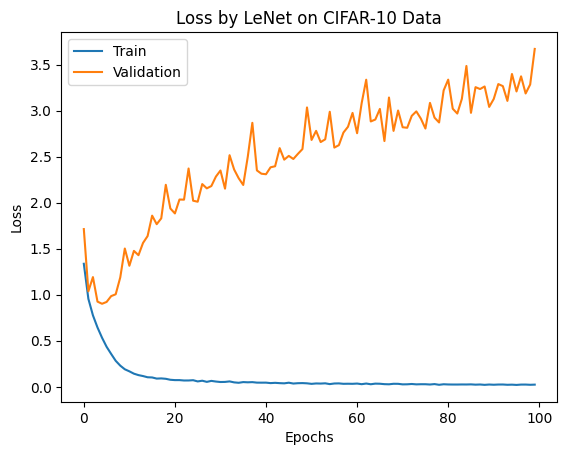

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[818,  17,  38,  11,   9,   5,   2,  10,  65,  25],
       [ 37, 815,  11,   7,   3,   4,   6,   5,  36,  76],
       [105,   5, 620,  78,  65,  43,  21,  24,  27,  12],
       [ 57,  10, 102, 526,  58, 141,  21,  23,  32,  30],
       [ 52,   5, 102,  78, 618,  27,  12,  67,  32,   7],
       [ 28,   8,  79, 196,  35, 545,   8,  64,  25,  12],
       [ 26,  17, 104,  94,  44,  48, 606,  22,  23,  16],
       [ 35,   3,  48,  58,  52,  38,   1, 733,  11,  21],
       [ 81,  26,  12,  15,   7,   7,   2,   1, 826,  23],
       [ 53,  65,  16,  12,   8,   7,   1,  10,  39, 789]])

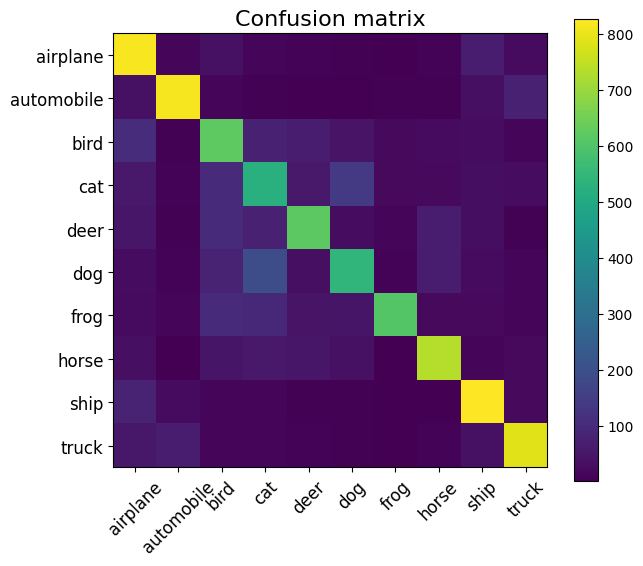

In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.6896


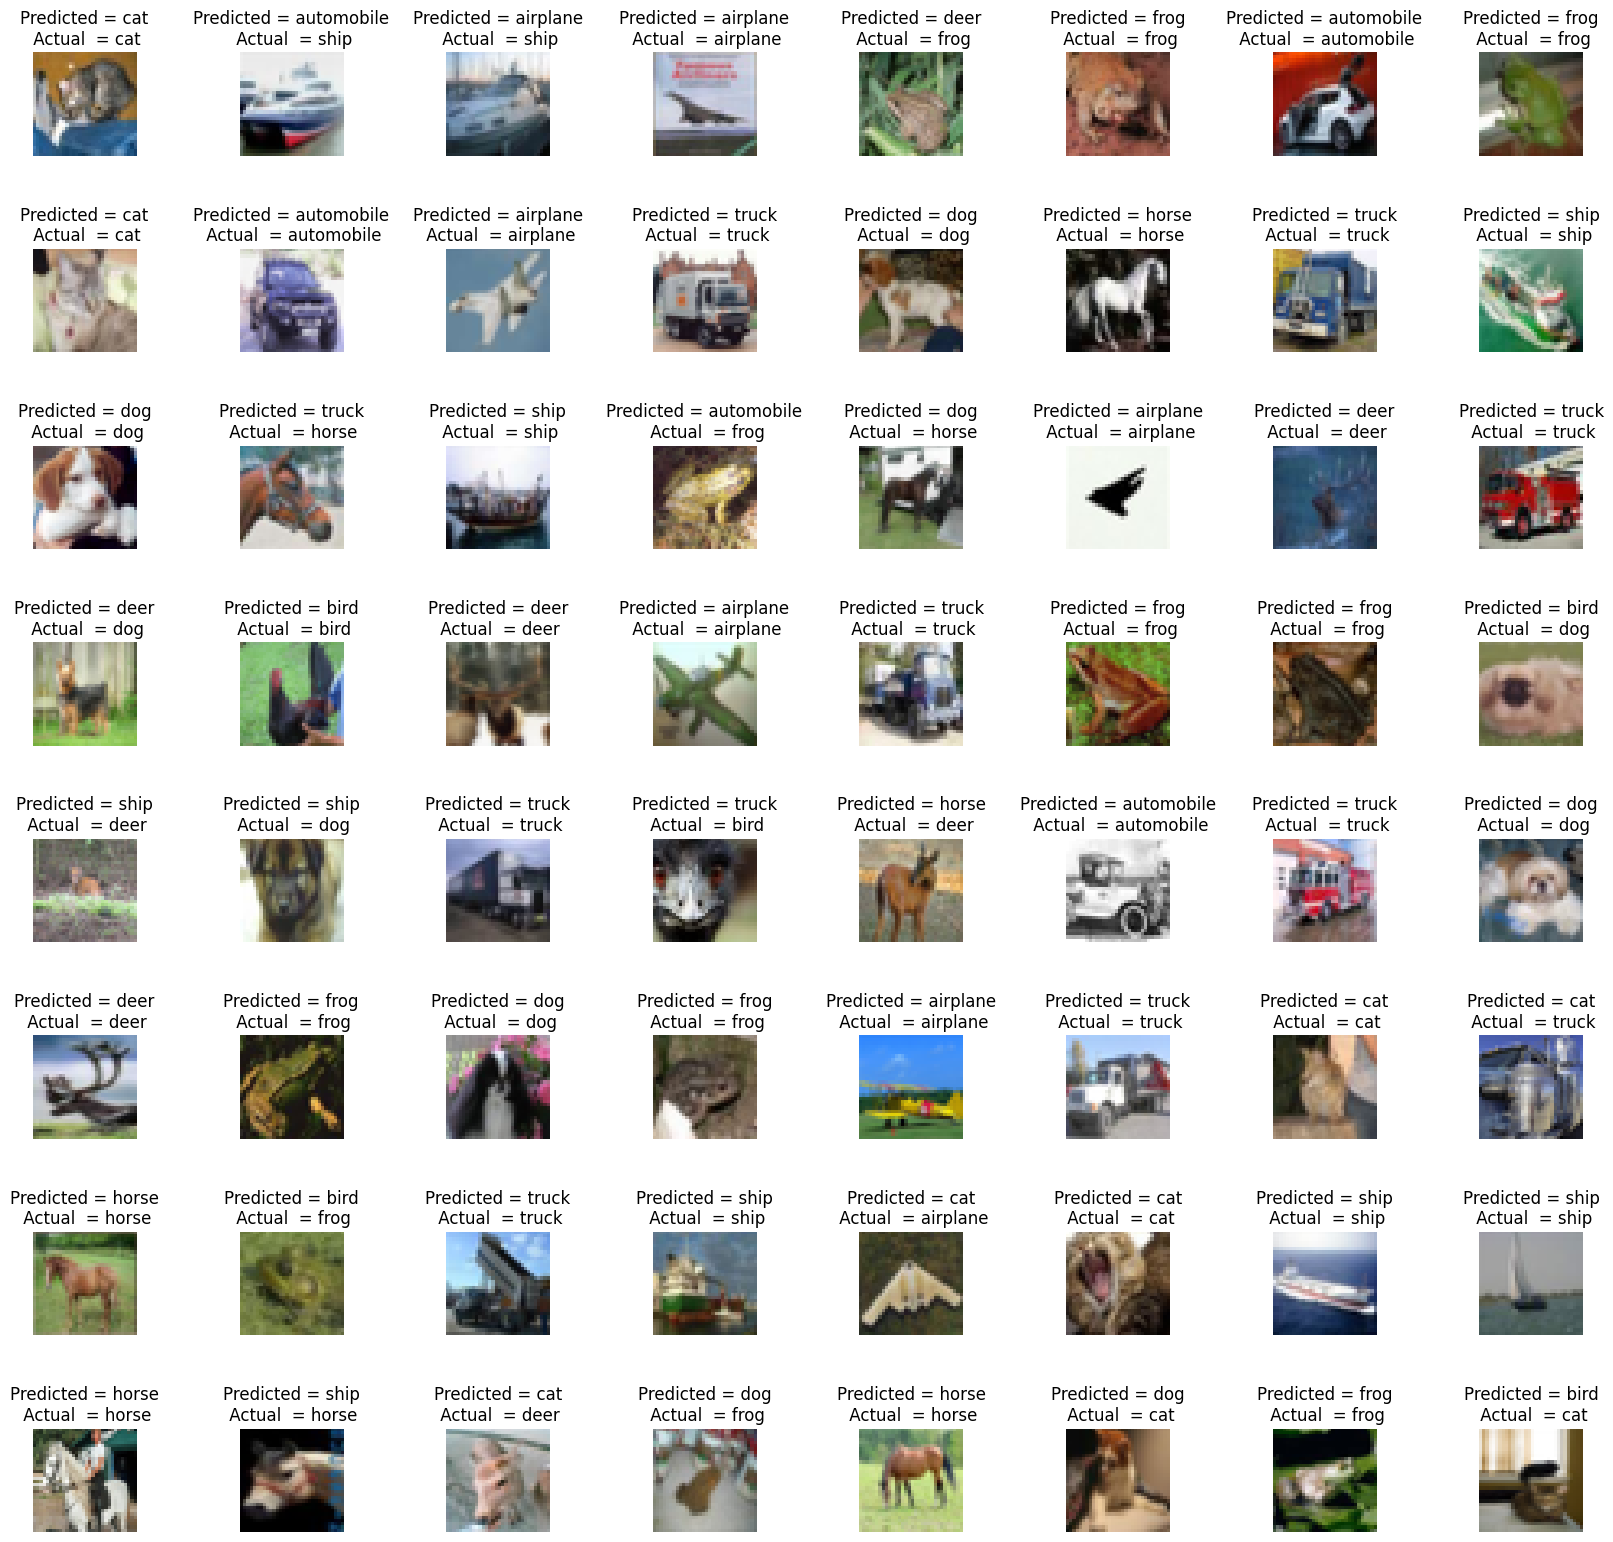

In [ ]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam


In [ ]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(32,32,3), activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
AlexNet.add(Conv2D(64, (5,5), padding='same', activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
AlexNet.add(Conv2D(128, (3,3), padding='same', activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(Flatten())
AlexNet.add(Dense(256, activation='relu'))
AlexNet.add(Dropout(0.3))
AlexNet.add(Dense(10, activation='softmax'))


AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,735,370 (6.62 MB)

 Trainable params: 1,734,922 (6.62 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stopping])


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4222 - loss: 1.6938 - val_accuracy: 0.5512 - val_loss: 1.2983
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6205 - loss: 1.0741 - val_accuracy: 0.5293 - val_loss: 1.5324
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6929 - loss: 0.8626 - val_accuracy: 0.6410 - val_loss: 1.0348
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7470 - loss: 0.7225 - val_accuracy: 0.6674 - val_loss: 0.9822
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7818 - loss: 0.6209 - val_accuracy: 0.5901 - val_loss: 1.3541
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8181 - loss: 0.5151 - val_accuracy: 0.7039 - val_loss: 0.9023
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8492 - loss: 0.4367 - val_accuracy: 0.6864 - val_loss: 1.0138
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8772 - loss:

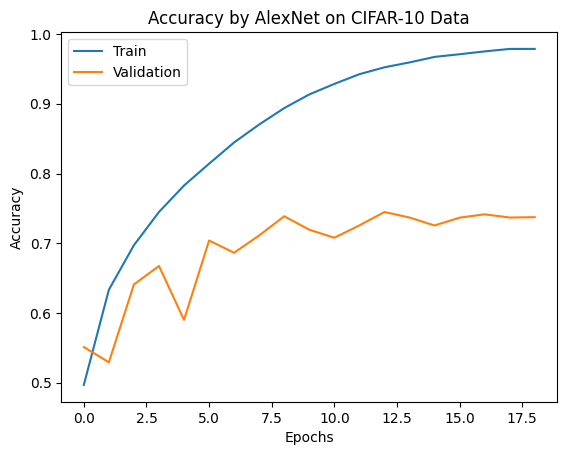

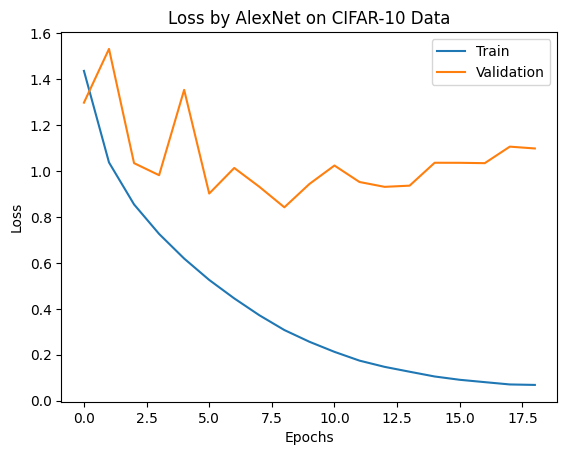

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[756,  16,  43,  27,  20,   9,   3,  11,  60,  55],
       [ 19, 805,   6,   8,   5,   4,   3,   3,  25, 122],
       [ 60,   5, 601,  75, 110,  56,  36,  28,  16,  13],
       [ 12,  10,  47, 613,  71, 137,  26,  41,  16,  27],
       [ 13,   3,  39,  64, 755,  19,  25,  62,  15,   5],
       [  9,   3,  34, 214,  49, 587,  15,  61,  11,  17],
       [ 10,   9,  38,  80,  70,  19, 746,   6,   7,  15],
       [ 12,   0,  16,  41,  54,  42,   3, 797,   5,  30],
       [ 40,  31,   9,  10,   7,   7,   4,   3, 856,  33],
       [ 19,  47,   7,  10,   5,   6,   2,   9,  24, 871]])

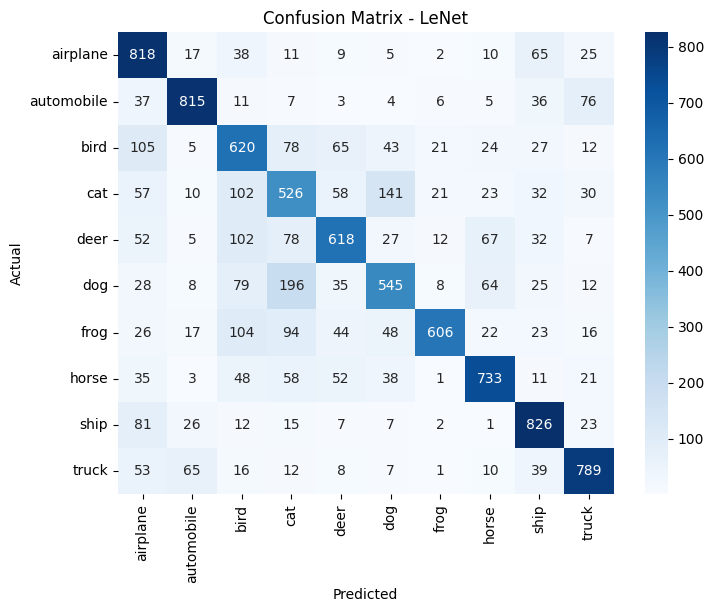

In [ ]:
# confusion matrix and accuracy
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - LeNet')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

Test accuracy by AlexNet: 0.6896


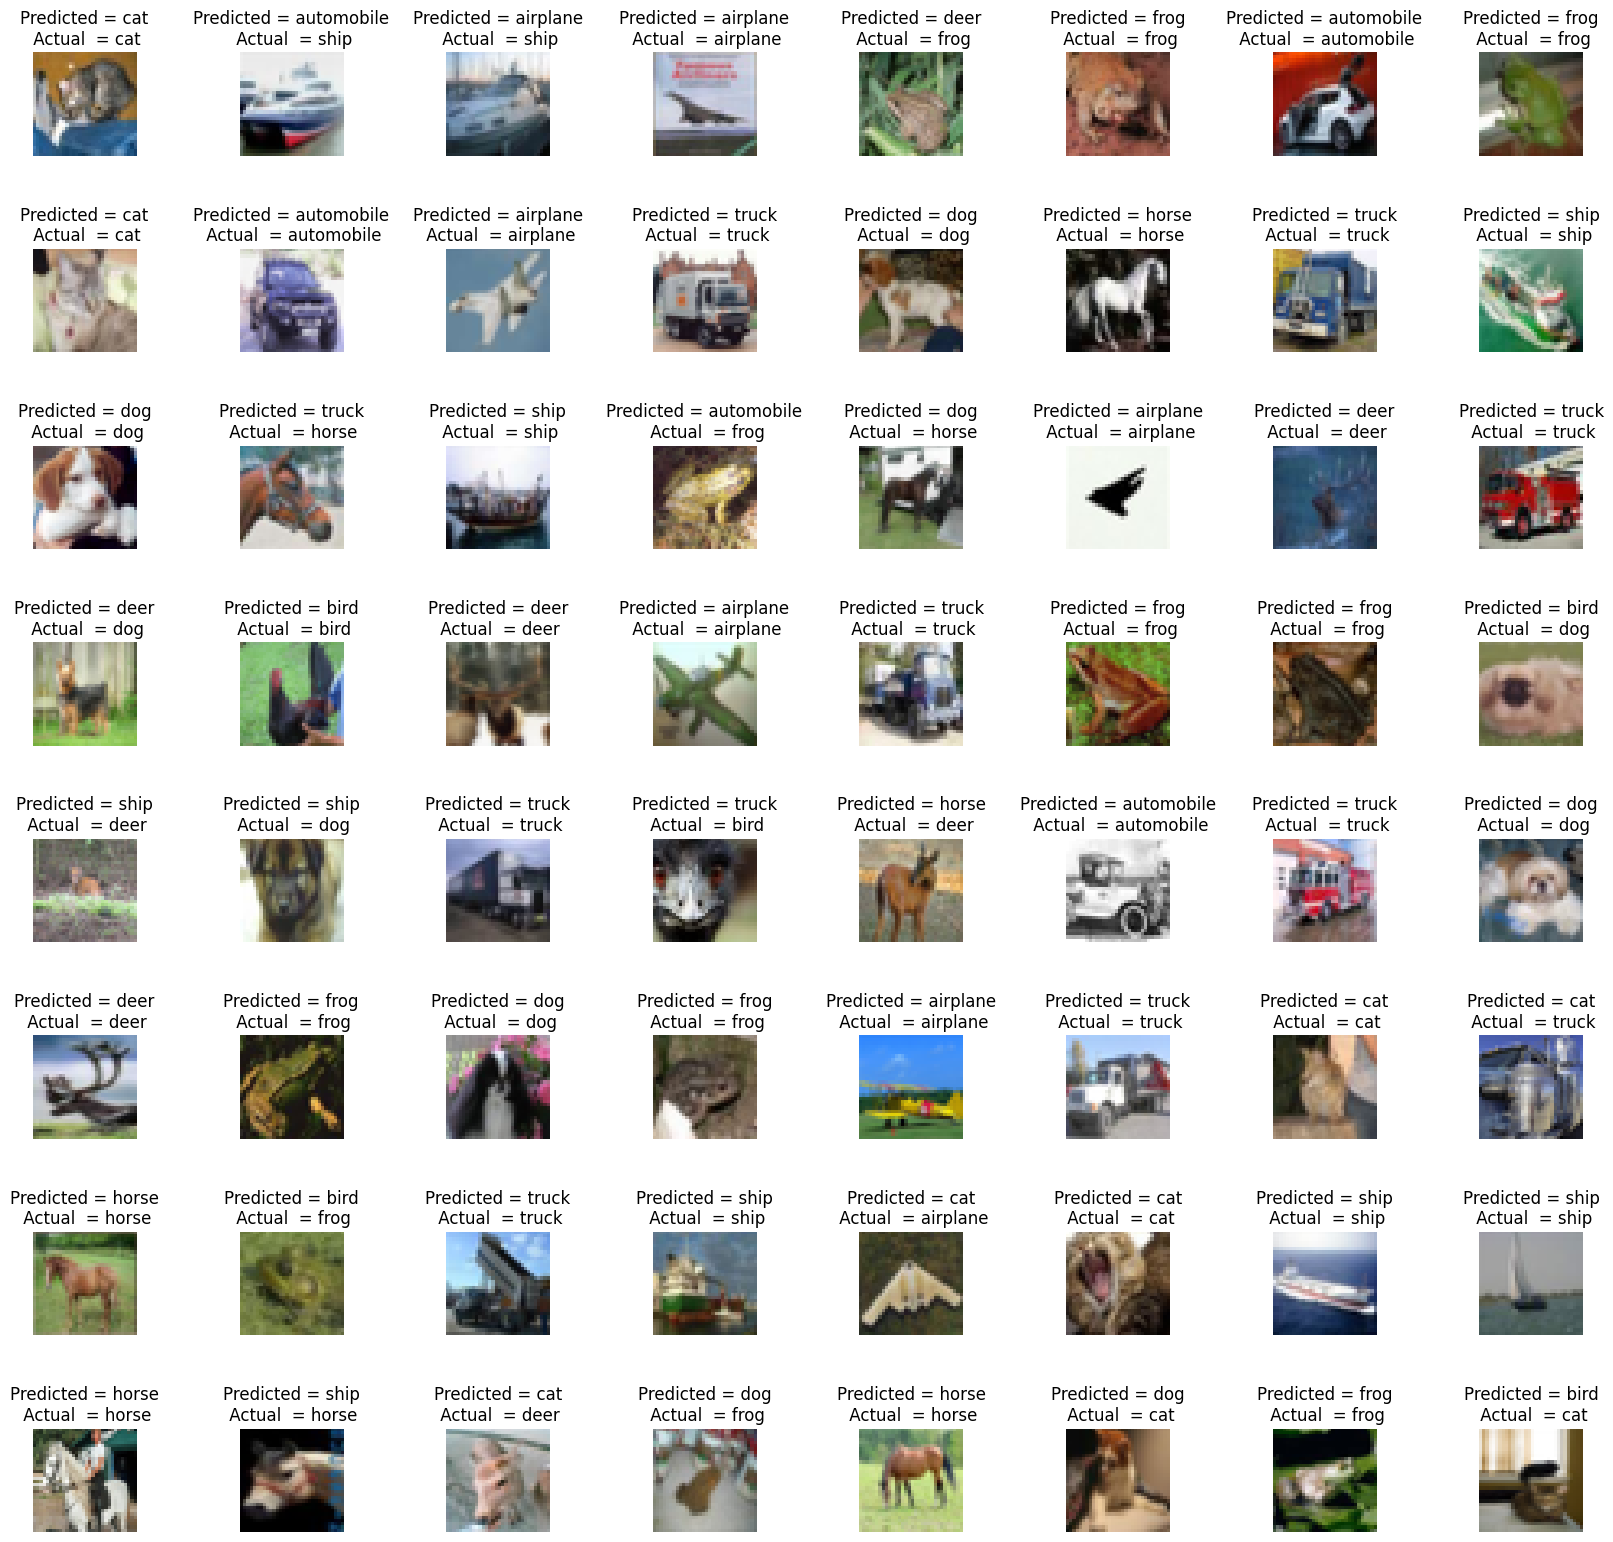

In [ ]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)